![alt text](enunciado_1.png)

Fluxograma

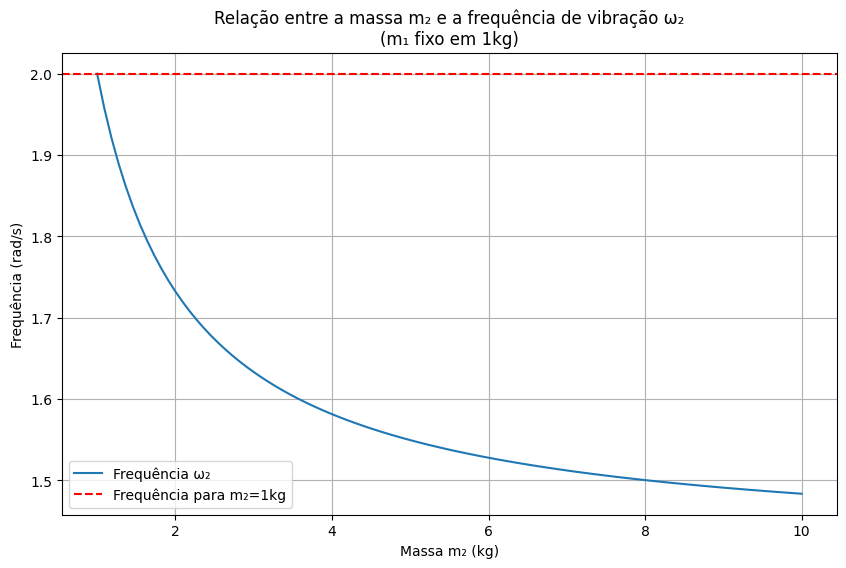

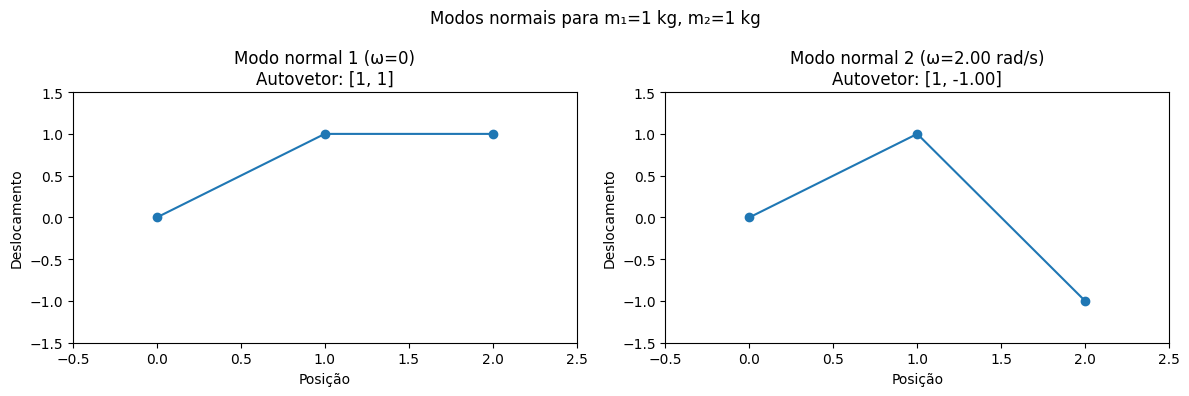

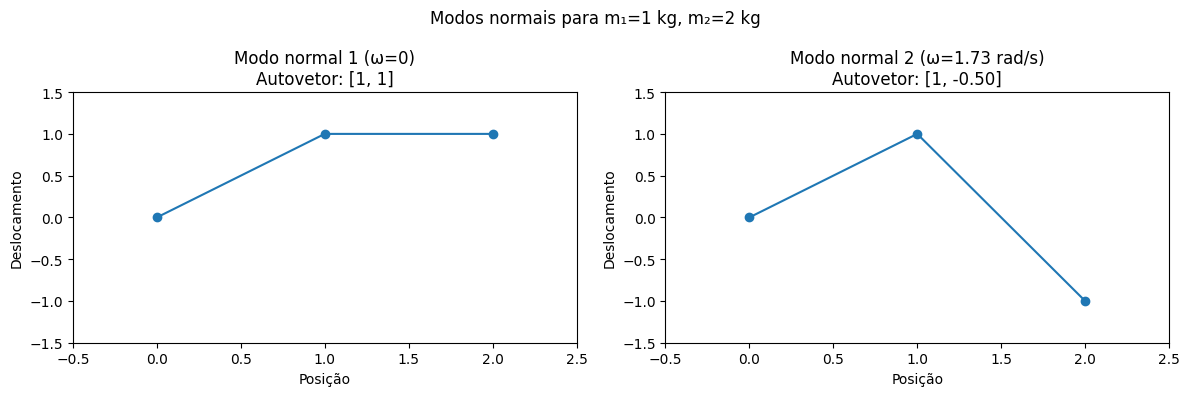

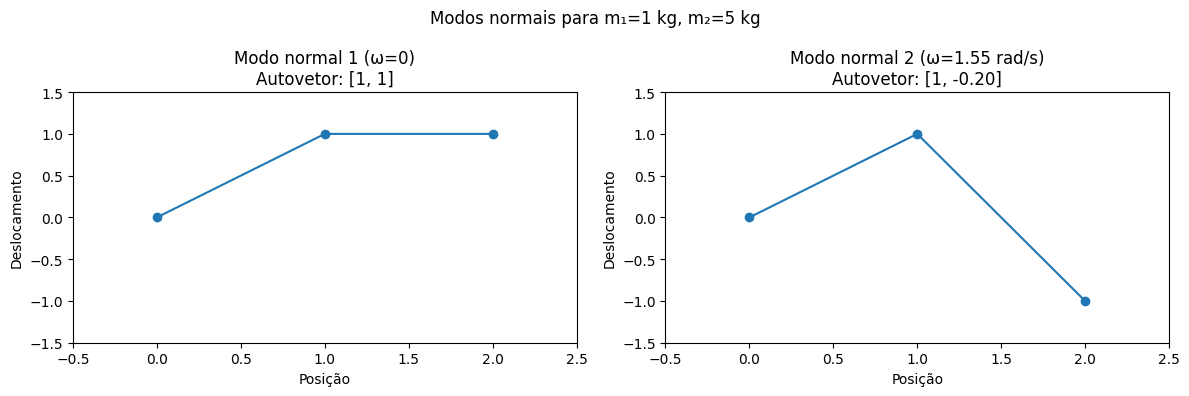

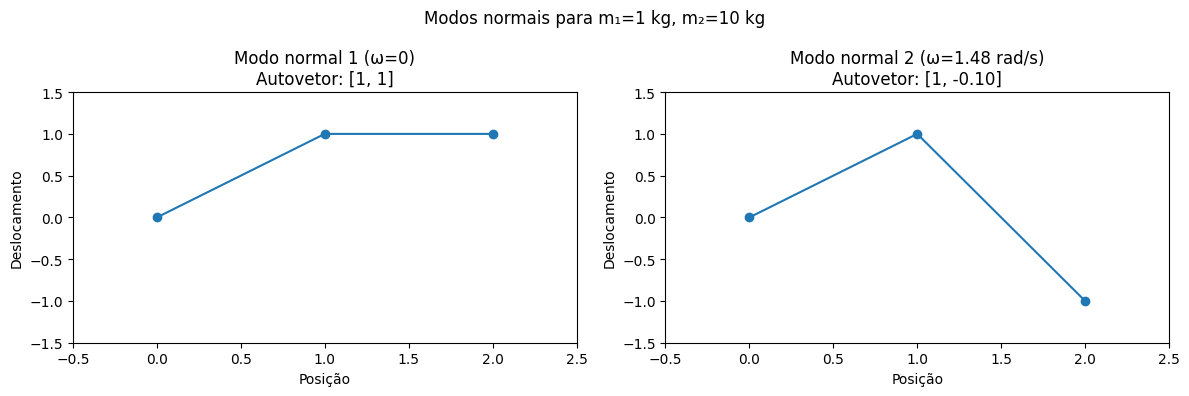

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
k = 1  # N/m
m1 = 1  # kg
m2_values = np.linspace(1, 10, 100)  # kg variando de 1 a 10

# Cálculo das frequências
omega2_values = np.sqrt(2*k*(m1 + m2_values)/(m1*m2_values))

# Gráfico da frequência em função de m₂
plt.figure(figsize=(10, 6))
plt.plot(m2_values, omega2_values, label='Frequência ω₂')
plt.axhline(y=2, color='r', linestyle='--', label='Frequência para m₂=1kg')
plt.xlabel('Massa m₂ (kg)')
plt.ylabel('Frequência (rad/s)')
plt.title('Relação entre a massa m₂ e a frequência de vibração ω₂\n(m₁ fixo em 1kg)')
plt.legend()
plt.grid(True)
plt.show()

# Modos normais para diferentes valores de m₂
def plot_normal_modes(m1, m2):
    omega = np.sqrt(2*(m1 + m2)/(m1*m2))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Modo 1 (ω=0)
    ax1.plot([0, 1, 2], [0, 1, 1], 'o-')
    ax1.set_title(f'Modo normal 1 (ω=0)\nAutovetor: [1, 1]')
    ax1.set_xlim(-0.5, 2.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlabel('Posição')
    ax1.set_ylabel('Deslocamento')
    
    # Modo 2
    ax2.plot([0, 1, 2], [0, 1, -1], 'o-')
    ax2.set_title(f'Modo normal 2 (ω={omega:.2f} rad/s)\nAutovetor: [1, -{m1/m2:.2f}]')
    ax2.set_xlim(-0.5, 2.5)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_xlabel('Posição')
    ax2.set_ylabel('Deslocamento')
    
    plt.suptitle(f'Modos normais para m₁={m1} kg, m₂={m2} kg')
    plt.tight_layout()
    plt.show()

# Casos específicos
plot_normal_modes(1, 1)    # m₂ = 1kg
plot_normal_modes(1, 2)    # m₂ = 2kg
plot_normal_modes(1, 5)    # m₂ = 5kg
plot_normal_modes(1, 10)   # m₂ = 10kg

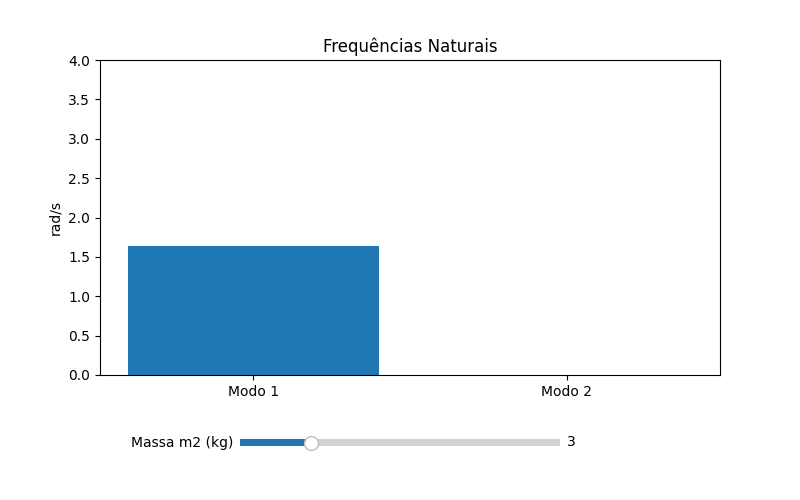

In [5]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Configuração inicial
m1, k = 1.0, 1.0
m2_inicial = 3.0

# Cria figura
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(bottom=0.25)

# Função para cálculo
def calcular_frequencias(m2):
    matriz = np.array([
        [2*k/m1, -2*k/m1],
        [-2*k/m2, 2*k/m2]
    ])
    return np.sqrt(np.abs(np.linalg.eigvals(matriz)))

# Plot inicial
freqs = calcular_frequencias(m2_inicial)
bars = ax.bar(['Modo 1', 'Modo 2'], freqs)
ax.set_ylim(0, 4)
ax.set_title('Frequências Naturais')
ax.set_ylabel('rad/s')

# Slider CORRETO (5 parâmetros)
ax_slider = plt.axes([0.3, 0.1, 0.4, 0.03])
slider_m2 = Slider(
    ax=ax_slider,
    label='Massa m2 (kg)',
    valmin=1,
    valmax=10,
    valinit=m2_inicial
)

# Função de atualização
def update(val):
    m2 = slider_m2.val
    novas_freqs = calcular_frequencias(m2)
    for bar, freq in zip(bars, novas_freqs):
        bar.set_height(freq)
    fig.canvas.draw_idle()

slider_m2.on_changed(update)

plt.show()

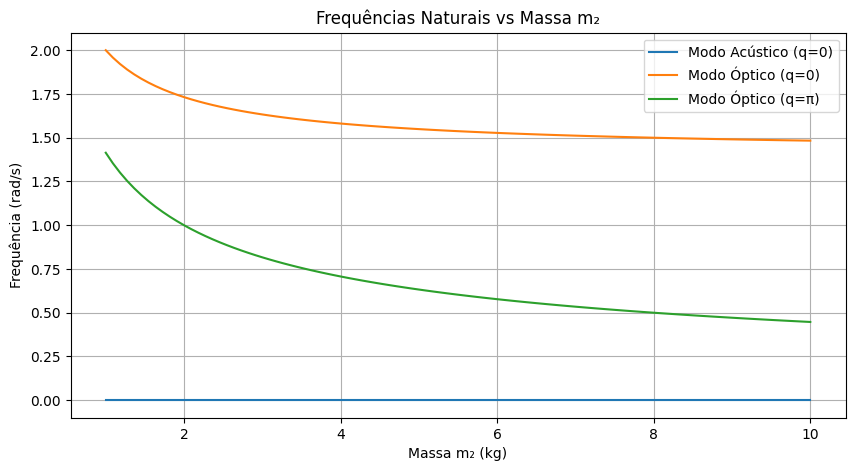

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
m1 = 1.0
k = 1.0
m2_values = np.linspace(1, 10, 100)  # De 1 a 10 kg

# Cálculo das frequências
omega_acustico = np.zeros(len(m2_values))  # ω=0 para q=0
omega_optico_q0 = np.sqrt(2 + 2/m2_values)  # Para q=0
omega_optico_qpi = np.sqrt(2/m2_values)     # Para q=π

# Plot
plt.figure(figsize=(10, 5))
plt.plot(m2_values, omega_acustico, label='Modo Acústico (q=0)')
plt.plot(m2_values, omega_optico_q0, label='Modo Óptico (q=0)')
plt.plot(m2_values, omega_optico_qpi, label='Modo Óptico (q=π)')
plt.xlabel('Massa m₂ (kg)')
plt.ylabel('Frequência (rad/s)')
plt.title('Frequências Naturais vs Massa m₂')
plt.legend()
plt.grid(True)
plt.show()

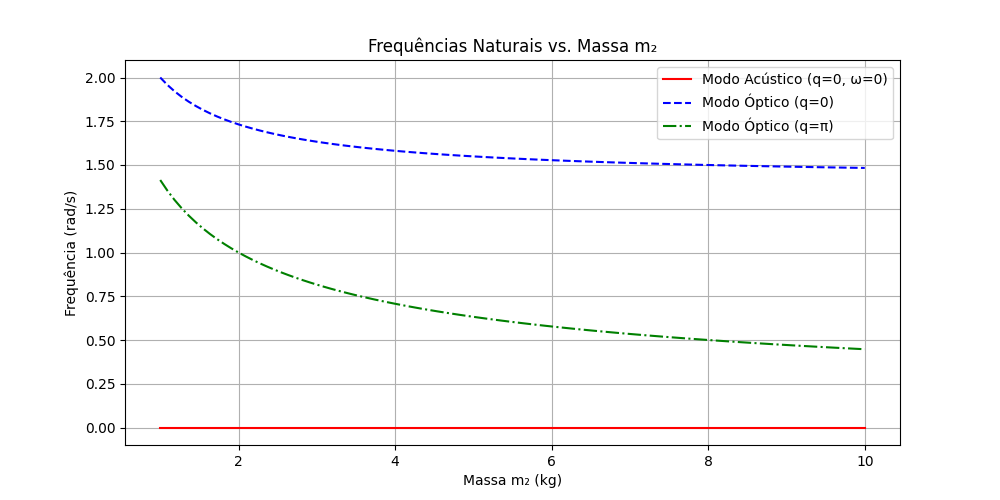

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
m2 = np.linspace(1, 10, 100)  # m₂ de 1 a 10 kg
k = 1.0
m1 = 1.0

# Cálculo das frequências
omega_acustico = np.zeros(len(m2))  # Sempre 0 para q=0
omega_optico_q0 = np.sqrt(2*k/m1 + 2*k/m2)  # Modo óptico em q=0
omega_optico_qpi = np.sqrt(2*k/m2)          # Modo óptico em q=π

# Plot
plt.figure(figsize=(10, 5))
plt.plot(m2, omega_acustico, 'r-', label='Modo Acústico (q=0, ω=0)')
plt.plot(m2, omega_optico_q0, 'b--', label='Modo Óptico (q=0)')
plt.plot(m2, omega_optico_qpi, 'g-.', label='Modo Óptico (q=π)')
plt.xlabel('Massa m₂ (kg)')
plt.ylabel('Frequência (rad/s)')
plt.title('Frequências Naturais vs. Massa m₂')
plt.legend()
plt.grid(True)
plt.show()

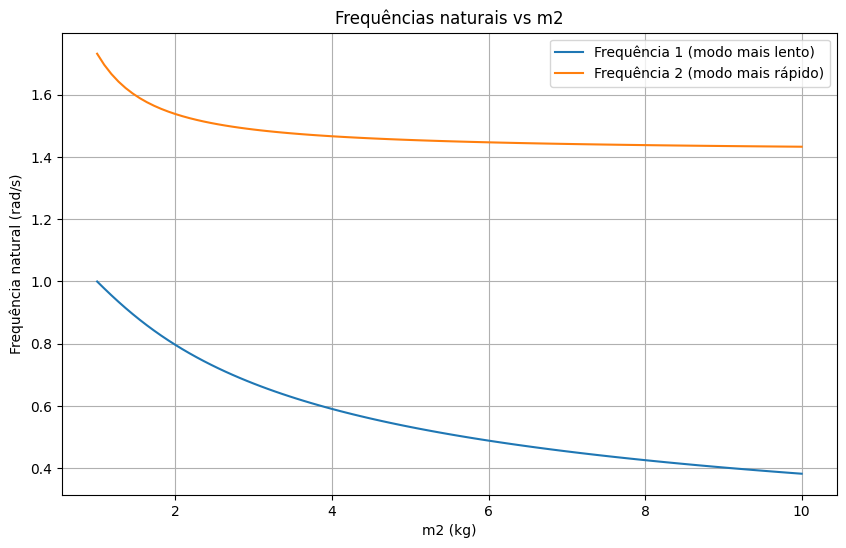

In [4]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Dados fixos
m1 = 1  # kg
k = 1   # N/m

# Função para montar e resolver o sistema massa-mola
def calcular_frequencias(m2):
    # Matriz de massa (diagonal)
    M = np.diag([m1, m2])
    
    # Matriz de rigidez com condição periódica (cíclica)
    K = np.array([
        [2*k, -k],
        [-k, 2*k]
    ])
    
    # Resolver o problema generalizado: Kx = w² Mx
    # eigh retorna autovalores (w²) e autovetores
    w2, modos = eigh(K, M)
    frequencias = np.sqrt(w2)
    
    return frequencias, modos

# Testar para diferentes valores de m2
valores_m2 = np.linspace(1, 10, 100)
frequencias1 = []
frequencias2 = []

for m2 in valores_m2:
    f, _ = calcular_frequencias(m2)
    frequencias1.append(f[0])
    frequencias2.append(f[1])

# Plotar
plt.figure(figsize=(10,6))
plt.plot(valores_m2, frequencias1, label='Frequência 1 (modo mais lento)')
plt.plot(valores_m2, frequencias2, label='Frequência 2 (modo mais rápido)')
plt.xlabel('m2 (kg)')
plt.ylabel('Frequência natural (rad/s)')
plt.title('Frequências naturais vs m2')
plt.grid(True)
plt.legend()
plt.show()



![alt text](enunciado_2.png)

Frequências naturais (rad/s):
Modo 1: nan rad/s
Modo 2: 1.1101 rad/s
Modo 3: 1.5602 rad/s


C:\Users\vinic\AppData\Local\Temp\ipykernel_11492\3390998175.py:21: RuntimeWarning: invalid value encountered in sqrt
  frequencias = np.sqrt(w2)


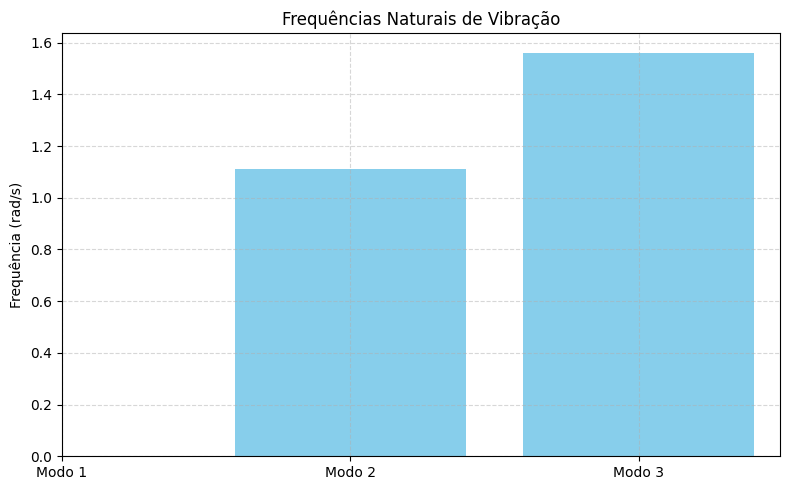

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

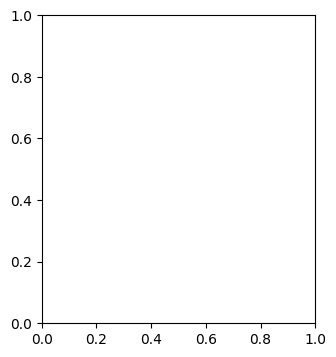

In [6]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Parâmetros do sistema
m1, m2, m3 = 1, 2, 3  # massas (kg)
k = 1  # constante da mola (N/m)

# Matriz de massa (diagonal)
M = np.diag([m1, m2, m3])

# Matriz de rigidez com ligações periódicas
K = k * np.array([
    [ 2, -1, -1],
    [-1,  2, -1],
    [-1, -1,  2]
])

# Resolver problema generalizado de autovalores
w2, modos = eigh(K, M)
frequencias = np.sqrt(w2)

# Mostrar frequências
print("Frequências naturais (rad/s):")
for i, f in enumerate(frequencias):
    print(f"Modo {i+1}: {f:.4f} rad/s")

# Plotar as frequências naturais
plt.figure(figsize=(8, 5))
plt.bar(range(1, 4), frequencias, tick_label=[f"Modo {i+1}" for i in range(3)], color='skyblue')
plt.title("Frequências Naturais de Vibração")
plt.ylabel("Frequência (rad/s)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plotar os modos normais
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.stem(range(1, 4), modos[:, i], basefmt=" ", use_line_collection=True)
    plt.title(f"Modo Normal {i+1}")
    plt.xlabel("Massa")
    plt.ylim(-1, 1)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Modos Normais de Vibração (Autovetores)")
plt.tight_layout()
plt.show()


![alt text](enunciado_3.png)

![alt text](enunciado_4.png)